<a href="https://colab.research.google.com/github/Parkseojin2001/Machine-Learning_with_python/blob/main/Chapter7_Working-with-text-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter7 텍스트 데이터 다루기

텍스트 데이터는 주로 글자가 연결된 문자열로 표현된다.

텍스트 데이터의 길이는 서로 같은 경우가 거의 없음 &rarr; 머신러닝 적용하기 전 전처리가 필요

## 7.1 문자열 데이터 타입

**문자열 데이터 종류**

- 범주형 데이터

- 범주에 의미를 연결시킬 수 있는 임의의 문자열

- 구조화된 문자열 데이터

- 텍스트 데이터

**범주형 데이터** : 고정된 목록으로 구성 = 드롭다운 메뉴

ex ) 사람들이 가장 좋아하는 색 : 8가지의 색 중 선택해야하는 경우

- 데이터셋에서 고유의 값을 찾아 히스토그램을 그려볼 수 있음

- 각 값이 애플리케이션에서 생각하는 범주에 적절한지 확인

**범주에 의미를 연결시킬 수 있는 임의의 문자열** : 직접 입력한 값 = 텍스트 필드로 제공되어 생성된 데이터

ex ) 사람들이 가장 좋아하는 색 : 철자를 틀림, 구체적으로 색을 작성, 자기만의 이름을 붙인 색을 입력

- 범주형 변수를 변환하려면 가장 보편적인 값을 선택 or 음답을 포용할 수 있는 범주를 정의

- 수작업을 많이 해야 하고 자동화하기 어려움

**구조화된 문자열 데이터**

ex ) 주소나 장소, 사람 이름, 날짜, 전화번호, 식별번호

- 분석하기 어려움

- 처리 방법이 문맥이나 분야에 따라 매우 다름

**텍스트 데이터** : 자유로운 형태의 절과 문장

ex ) 트윗, 채팅, 호텔 리뷰, 셰익스피어 작품

- 대부분 단어로 구성된 문장에 정보를 담고 있음

- 말뭉치(corpus) : 데이터셋

- 문서(document) : 각 데이터 포인트

## 7.2 예제 애플리케이션 : 영화 리뷰 감성 분석

사용할 데이터 : 영화 리뷰 데이터셋

- 리뷰 텍스트 + '양성' or '음성'을 나타내는 레이블

- 7점 이상은 '양성'이고 4점 이하는 '음성'으로 분류



In [ ]:
! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
! tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data

File ‘data/aclImdb_v1.tar.gz’ already there; not retrieving.



In [ ]:
!find ./data -type d

./data
./data/aclImdb
./data/aclImdb/test
./data/aclImdb/test/pos
./data/aclImdb/test/neg
./data/aclImdb/train
./data/aclImdb/train/pos
./data/aclImdb/train/unsup
./data/aclImdb/train/neg


In [ ]:
!rm -r data/aclImdb/train/unsup

In [ ]:
!pip install mglearn

In [ ]:
!pip install --upgrade joblib==1.1.0

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load_files : 훈련 데이터 읽기
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [ ]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [ ]:
print("클래스별 샘플 수 (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [ ]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수:", len(text_test))
print("클래스별 샘플 수 (테스트 데이터):", np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


## 7.3 텍스트 데이터를 BOW로 표현하기

BOW(bag or words) : 텍스트를 표현하는 방법 중 가장 간단하고 효과적이면서 널리 쓰이는 방법

- 장, 문단, 문장, 서식 같은 입력 텍스트의 구조 대부분을 잃음

- 각 단어가 이 말뭉치에 있는 텍스트에 알마나 많이 나타나는지 계산

- 단어의 출현 횟수만 계산, 구조 상관 X

**전체 말뭉치에 대한 계산 단계**

1. **토큰화(tokenization)** : 각 문서를 문서에 포함된 단어(토큰)로 나눕니다. 예를 들어 공백이나 구두점 등을 기준으로 분리

2. **어휘 사전 구축** : 모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매김(알파벳 순서).

3. **인코딩** : 어휘 사전의 단어가 문서마다 몇 번이나 나타나는지를 헤아림.

**샘플 데이터에 BOW 적용하기**

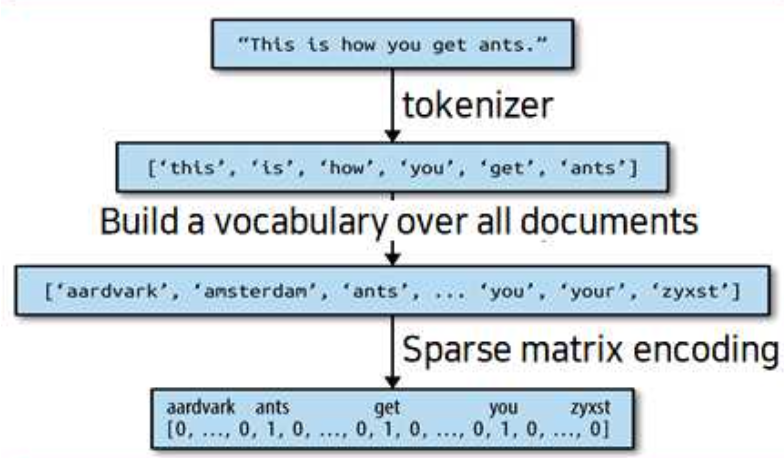

- 출력은 각 문서에서 나타난 단어의 횟숫가 담긴 하나의 벡터

- 수치 표현은 전체 데이터셋에서 고유한 각 단어를 특성으로 가짐

- 원본 문자열에 있는 단어의 순서는 BOW 특성 표현에서는 완전히 무시됨

### 7.3.1 샘플 데이터에 BOW 적용하기



In [ ]:
bards_words = ["The fool doth think he is wise,", "but the wise man knows himself to be a fool"]

In [ ]:
# fit 메서드 : 훈련 데이터를 토큰으로 나누고 어휘 사전을 구축하여 vocabulary_속성에 저장
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [ ]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:\n", vect.vocabulary_)

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [ ]:
# BOW 표현 만들기
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


**결과 분석**

- 행렬의 크기는 2 x 13 인데, 각각의 행은 하나의 데이터 포인트를 나타냄

- 각 특성은 어휘 사전에 있는 각 단어에 대응

In [ ]:
print("BOW의 밀집 표현:\n", bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


**출력 결과 분석**

- 각 단어의 출현 횟수는 0아니면 1 &rarr; bards_words에 있는 두 문자열 모두 같은 단어를 두 개 이상 가지고 있지 않음

- 첫 번째 행 = "The fool doth think he is wise," 를 나타냄

- 두 번째 행 = "but the wise man knows himself to be a fool" 을 나타냄

- 어휘 사전의 순서대로 나오는 단어의 개수가 나열되어있는 배열임 (ex. 첫 번째 단어(be) - 첫 번째 문장에서는 0번, 두 번째 문장에서는 1번 나옴)

### 7.3.2 영화 리뷰에 대한 BOW


In [ ]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))

X_train:
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


- 훈련 데이터의 BOW 표현인 X_train의 크기는 25,000 x 74,849로, 이 어휘 사전은 단어를 74,849개 담고 있음

- SciPy 희소 행렬로 저장

In [ ]:
# get_feature_names_out 메서드는 각 특성에 해당하는 단어를 리스트로 반환
feature_names = vect.get_feature_names_out()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\n", feature_names[:20])
print("20010에서 20030까지 특성:\n", feature_names[20010:20030])
print("매 2000번째 특성:\n", feature_names[::2000])

특성 개수: 74849
처음 20개 특성:
 ['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
20010에서 20030까지 특성:
 ['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
매 2000번째 특성:
 ['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


**출력 결과 분석**

- 어휘 사전의 처음 20개 중 15개의 항목이 숫자임 &rarr; 대부분은 그 자체로 의미가 있지 않으므로 선별하기가 쉽지 않음

- "dra"로 시작하는 "draught", "drawback", "drawer" 모두 단수와 복수형이 서로 다른 단어로 어휘 사전에 포함<br>
  &rarr; 의미가 매우 비슷하므로 다른 특성으로 간주하여 개별적으로 기록하는 것은 바람직하지 않음

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter = 1000), X_train, y_train, n_jobs = -1)
print("Cross-validation mean score: {:.2f}".format(np.mean(scores)))

Cross-validation mean score: 0.88


In [ ]:
# LogisticRegression 규제 매개변수 C가 존재
# 그리드 서치를 사용해 조정
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best cross_validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross_validation score: 0.89
Best parameters:  {'C': 0.1}


In [ ]:
# 테스트 세트의 일반화 성능
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.88


**단어 추출 방법**

- CountVectorizer는 정규표현식을 사용해 토큰을 추출한다.

- 모든 단어를 소문자로 바꾸므로 모두 같은 토큰(즉 특성)이 됨 &rarr; 의미 없는 특성(숫자 같은)을 많이 생성

*의미없는 특성(숫자 같은)을 줄이는 방법*

- 두 개의 문서(또는 다섯 개의 문서 등)에 나타난 토큰만을 사용

**정규방정식** : "b\w\w + \b"

- 경계(\b)가 구분되고 적어도 둘 이상의 문자나 숫자(\w)가 연속된 단어를 찾는 방법

- "doesn't" 같은 축약형이나 "bit.ly" 같은 단어는 분리되고, "h8ter"는 한 단어로 매칭됨


In [ ]:
# min_df 매개변수 : 토큰이 나타날 최소 문서 개수를 지정
# 토큰(단어)가 적어도 다섯 번 이상 나타내는 특성만 추출 -> 특성의 수가 줄음
vect = CountVectorizer(min_df = 5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [ ]:
# 숫자 길이가 줄음
# 희귀한 단어와 철자가 틀린 단어들이 사라짐
feature_names = vect.get_feature_names_out()

print("처음 50개 특성:\n", feature_names[:50])
print("20,010부터 20,030까지 특성:\n", feature_names[20010:20030])
print("매 700번째 특성:\n", feature_names[::700])

처음 50개 특성:
 ['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
20,010부터 20,030까지 특성:
 ['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']
매 700번째 특성:
 ['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrusting' 'tvs' 'vampyre' 'we

In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid, n_jobs = -1)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.89


- 특성의 개수가 줄어서 처리 속도가 빨라지고, 불필요한 특성이 없어져 모델을 이해하기 쉬워짐

## 7.4 불용어

의미 없는 단어를 제거하는 또 다른 방법은 너무 빈번하여 유용하지 않은 단어를 제외하는 것이 있다.

- 언어별 불용어(stopword) 목록을 사용하는 것

- 언어별 불용어 목록을 너무 자주 나타나는 단어를 제외하는 것

*scikit-learn은 feature_extraction.text 모듈에 영어의 불용어를 가지고 있음*

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수: ", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:\n", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수:  318
매 10번째 불용어:
 ['at', 'that', 'top', 'sometime', 'whence', 'found', 'co', 'thereby', 'name', 'nothing', 'always', 'elsewhere', 'was', 'none', 'three', 'their', 'meanwhile', 'two', 'rather', 'off', 'where', 'all', 'five', 'could', 'but', 'everyone', 'it', 'nine', 'against', 'afterwards', 'between', 'move']


불용어를 제외하면 특성의 개수가 이 목록의 길이(318개) 만큼만 줄어들겠지만, 성능이 향상될 수 있음

In [ ]:
# stop_words = "english"라고 지정하면 내장된 불용어를 사용
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용
vect = CountVectorizer(min_df = 5, stop_words = "english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n", repr(X_train))

불용어가 제거된 X_train:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


원래 특성 개수 : 27,271개

불용어가 제거된 특성 개수 : 26,966개 (27,271 - 305)

In [ ]:
grid = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.88


**출력된 결과 분석**

- 불용어를 사용한 그리드 서치의 성능은 조금 감소함

- 특성 305개를 제외했다고 성능이나 모델 해석이 나아지지 않음 &rarr; 도움이 안되었음

*고정된 불용어 목록은 모델이 데이터셋만 보고 불용어를 골라내기 어려운 작은 데이터셋에서나 도움이 됨*

## 7.5 tf-idf로 데이터 스케일 변경하기

얼마나 의미 있는 특성인지를 계산해서 스케일을 조정하는 방식이 있다.

**tf-idf(term frequency-inverse document frequency)** : 말뭉치의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법

- 한 단어가 특정 문서에 자주 나타나고 다른 여러 문서에서는 그렇지 않다면, 그 문서의 내용을 아주 잘 설명하는 단어라고 할 수 있음

- scikit-learn은 두 개의 파이썬 클래스(TfidfTransformer, TfidfVectorizer)에 tf-idf를 구현

- tf-idf는 실제로 훈련 데이터의 통계적 속성을 사용

*TfidfTransformer*

- CountVectorizer가 만든 희소 행렬을 입력받아 변환

*TfidfVectorizer*

- 텍스트 데이터를 입력받아 BOW 특성 추출과 tf-idf 변환을 수행

**문서 d에 있는 단어 w에 대한 tf-idf 점수 정의**

<img src = "https://latex.codecogs.com/svg.image?tfidf(w,%20d)%20=%20tf(log(\frac{N+1}{N_{w}+1})%20+%201)">

- N : 훈련 세트에 있는 문서의 개수

- N_w : 단어 w가 나타난 훈련 세트 문서의 개수

- tf(단어 빈도수) : 단어 w가 대상 문서 d(변환 또는 인코딩하려는 문서)에 나타난 횟수

두 파이썬 클래스 모두 tf-idf 계산을 한 후에 L2 정규화(L2 normalization)를 적용<br>

&rarr; 유클리디안 노름(euclidean norm)이 1이 되도록 각 문서 벡터의 스케일을 바꿈(문서의 길이 = 단어의 수에 영향을 받지 않음)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df = 5), LogisticRegression(max_iter = 5000))
param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, n_jobs = -1)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


**출력 결과 분석**

- tf-idf가 성능에 큰 영향을 주지 못함

- tf-idf 변환은 문서를 구별하는 단어를 찾는 방법이지만 완전히 비지도 학습 = '긍정적인 리뷰'와 '부정적인 리뷰' 레이블과 꼭 관계있지 않음

In [ ]:
# TfidfVectorizer 단계를 선택
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾음
max_value = X_train.max(axis = 0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성 이름 구하기
feature_names = np.array(vectorizer.get_feature_names_out())
print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성: \n", feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성: 
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


**tf-idf가 낮은 특성**

- 전체 문서에 걸쳐 매우 많이 나타남

- 조금씩만 사용

- 매우 긴 문서에만 사용

**tf-idf가 높은 특성**

- 특정한 쇼나 드라마에 대한 리뷰에서만 나타남

  - "pokemon", "smallville", "doodlebops" : 디지니의 어린이용 뮤지컬 코미디 프로그램

  - "scanners" : 공포 영화

- 감성 분석(긍정/ 부정)에 도움이 되지는 않지만 리뷰에 대한 구체적은 정보를 많이 포함

In [ ]:
# idf 값이 낮은 단어 = 자주 나타나서 덜 중요하다고 생각되는 단어 확인
# 훈련 세트의 idf 값은 idf_ 속성에 저장
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n", feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


**idf 값이 낮은 단어 분석**

- "the", "no" 같은 영어 불용어

- "movie", "film", "time", "story" 같이 영화 리뷰에서만 나타나는 단어

- "good", "great", "bad"도 매우 자주 나타나는 단어라서 감성 분석에 중요함<br>
  
  *but, tf-idf로 봤을 때는 덜 중요한 단어*

## 7.6 모델 계수 조사

로지스틱 회귀 모델이 실제로 이 데이터에서 무엇을 학습했는지 자세히 볼 수 있음

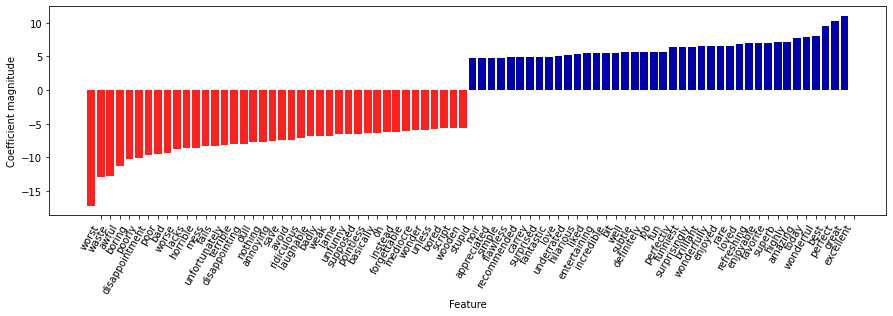

In [ ]:
# 가장 큰 계수 40개와 가장 작은 계수 40개를 출력
# tf-idf 특성으로 훈련시킨 로지스틱 회귀의 최댓값, 최솟값 계수
# 막대의 크기 : 계수의 크기
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features = 40
)

**그래프 분석**

- 왼쪽의 음수 계수 : 부정적인 리뷰를 의미하는 단어가 속함

- 오른쪽의 음수 계수 : 긍정적인 리뷰를 의미하는 단어가 속함

- "bit", "job", "today" 같은 단어는 덜 명확하지만 아마도 "good job"이나 "best today" 같은 구절의 일부로 볼 수 있음
